In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed
    # you can uncomment the following lines to install it automatically
    #import subprocess ; subprocess.check_call([sys.executable, "-m", "pip", "install", "pyqula"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'


import numpy as np

# Interactions and classical symmetry broken magnetism
In this session we will address system featuring magnetism at the mean-field level

### Contents
- Symmetry breaking by magnetic interactions
- The strong coupling limit of a magnetic system
- Intermediate coupling regime and Stoner instability
- Non-collinear magnetism from competing interactions
- Non-collinear magnetism from spin-orbit coupling
- Non-collinear magnetism from magnetic frustration


## Bandstructure of a tight binding chain
We will start showing the magnetic instabilities of a 1D chain at half filling, with two sites per unit cell

([], [])

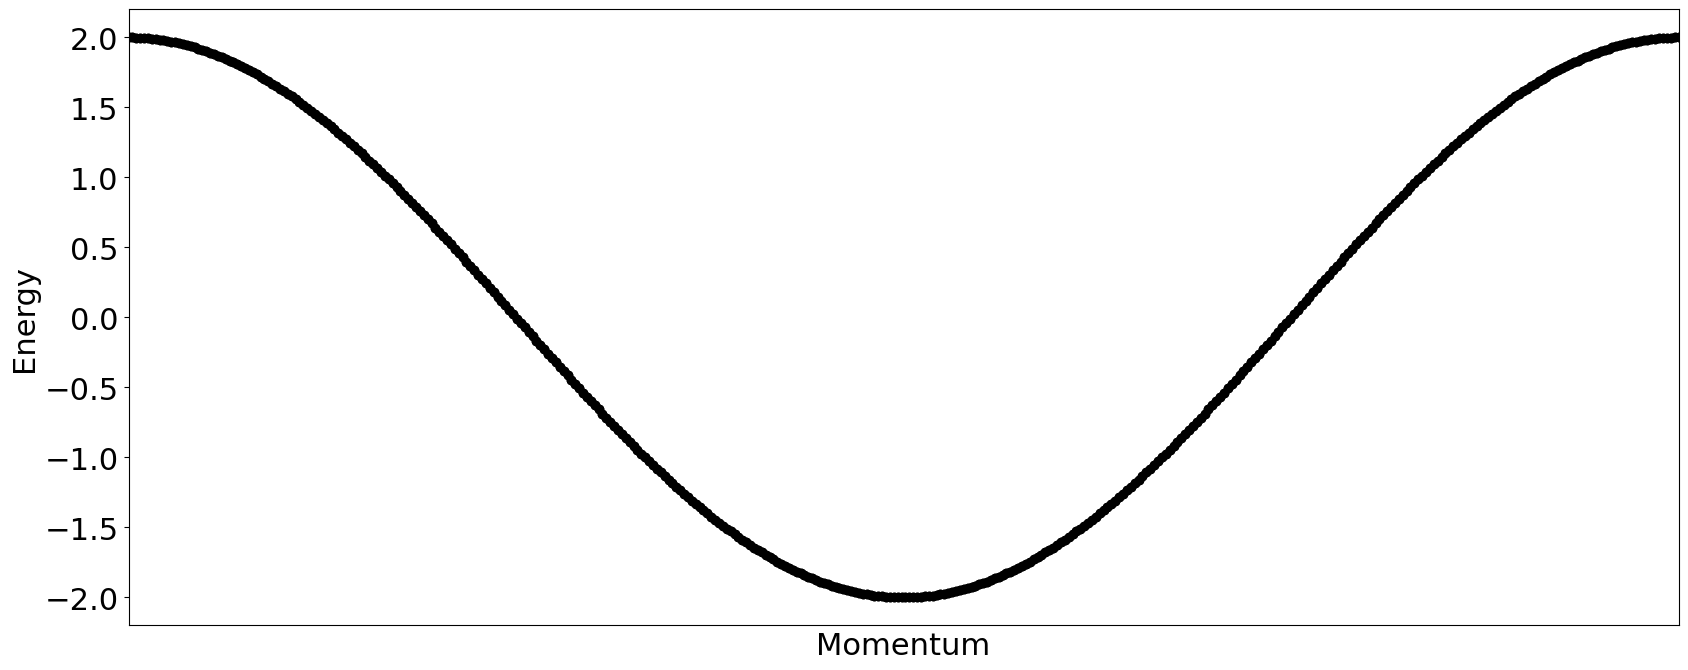

In [10]:
from pyqula import geometry
g = geometry.chain() # generate a chain
#Ls = range(2,10)

NS = 2 # size of the supercell
#g = g.get_supercell(NS) # make a supercell
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.xlim([min(k),max(k)]) # adjust plot
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Quiz
- Whatis the functional form of the electronic dispersion

## Finite size chains
We will now see how the spectra of a finite chain evolves with its length

Text(0, 0.5, 'Energy')

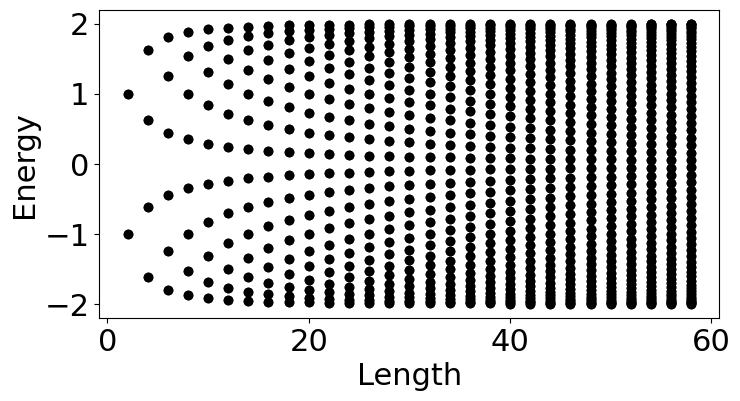

In [11]:
fig = plt.figure(figsize=(8,4))

Ls = range(2,60,2) # different lengths

for L in Ls:
    g = geometry.chain() # generate a chain
    g = g.get_supercell(L) # make a supercell
    g.dimensionality = 0 # make it finite
    h = g.get_hamiltonian() # generate the Hamiltonian
    (k,e) = h.get_bands() # compute band structure
    plt.scatter(e*0. + L,e,c="black")
plt.xlabel("Length") ; plt.ylabel("Energy")

### Quiz
- Why the number of eigenvalues increases with the system size?
- Make a log plot of the gap and obtain its functional dependence with the system size

## Magnetic order driven by interactions in a chain

(-3.85, 3.85, -0.05500000000000001, 0.05500000000000001)

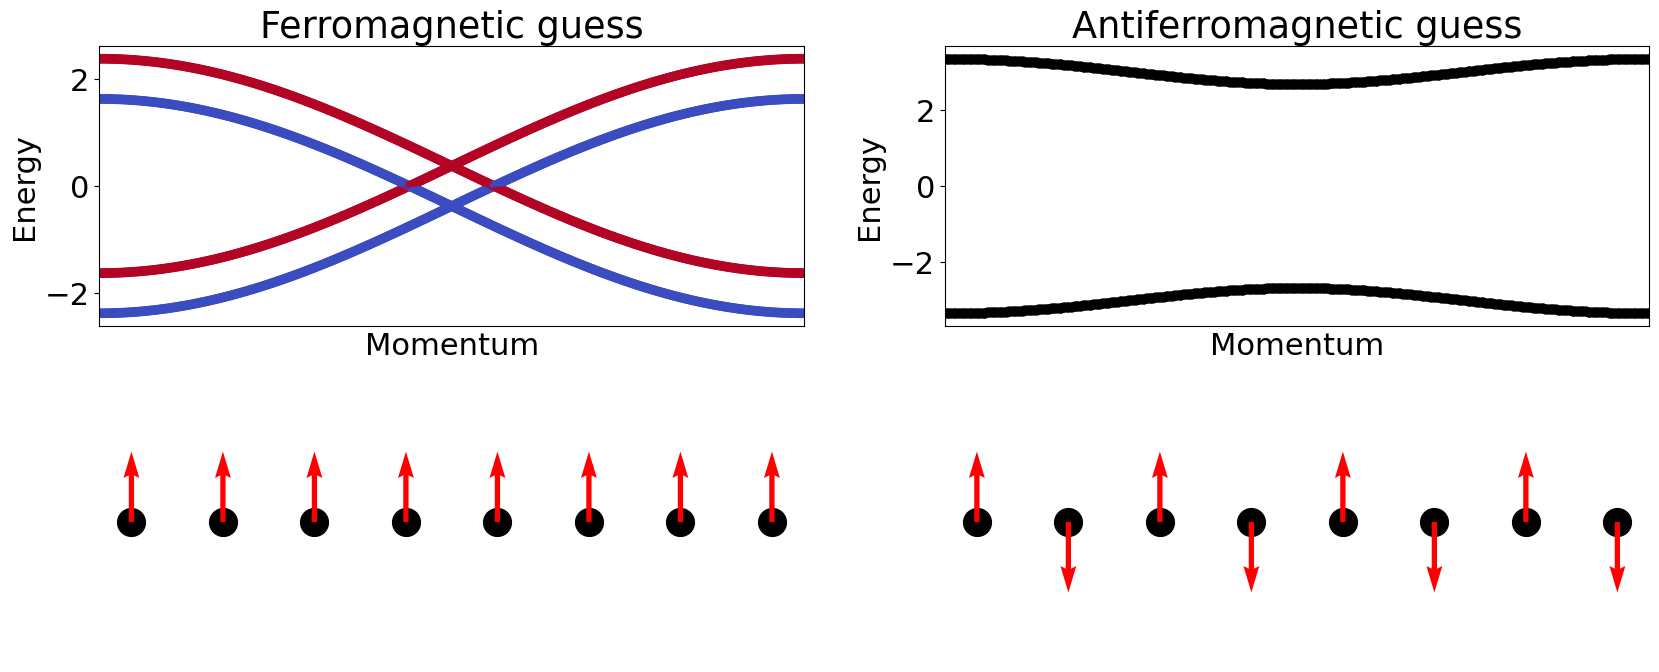

In [12]:
# let us now add interactions, and compute the electronic structure
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell (with internal sublattice)
h = g.get_hamiltonian() # generate the Hamiltonian

U = 6.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")
hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro") # solve the interacting problem with a mean-field guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) # plot

# plot magnetization
hs = hfe.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro") # solve the interacting problem with a mean-field guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) # plot

# plot magnetization
hs = haf.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

### Quiz
- Discuss which solution you think it has the lowest energy, and why
- Compute the selfconsistent solution for stronger values of the interaction. Which change do you observe?

## The spectra of a dimer
Here we will review the electronic spectra of a tight binding dimer

Text(0.5, 0, 'State index')

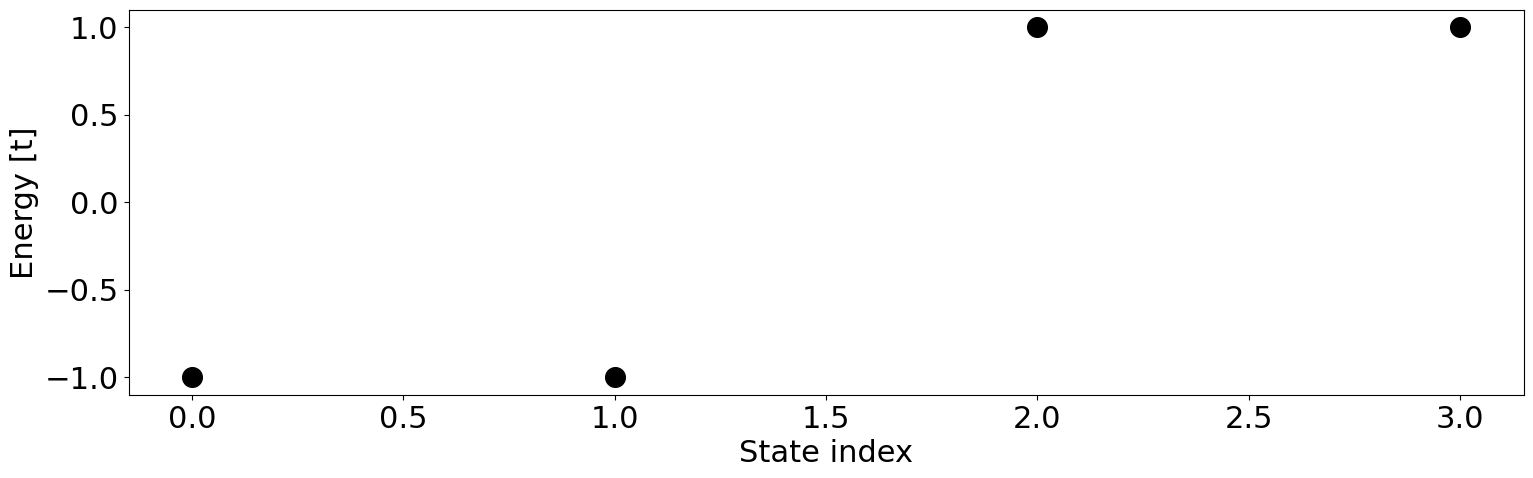

In [102]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell (with internal sublattice)
g.dimensionality = 0 # just retain the two sites per unit cell

plt.figure(figsize=(18,5))
h = g.get_hamiltonian(has_spin=True) # generate Hamiltonian

(ks,es) = h.get_bands() # get bands
plt.scatter(range(len(es)),es,c="black",s=200) ; plt.ylabel("Energy [t]") ; plt.xlabel("State index")

### Quiz
- There two sites in the system, why do we have four eigenstates?
- Why are the state degenerate in energy?

## The interacting Hubbard dimer
Here we will see how the magnetization evolves in an interacting dimer chain

Text(0, 0.5, '$\\langle S_z \\rangle $')

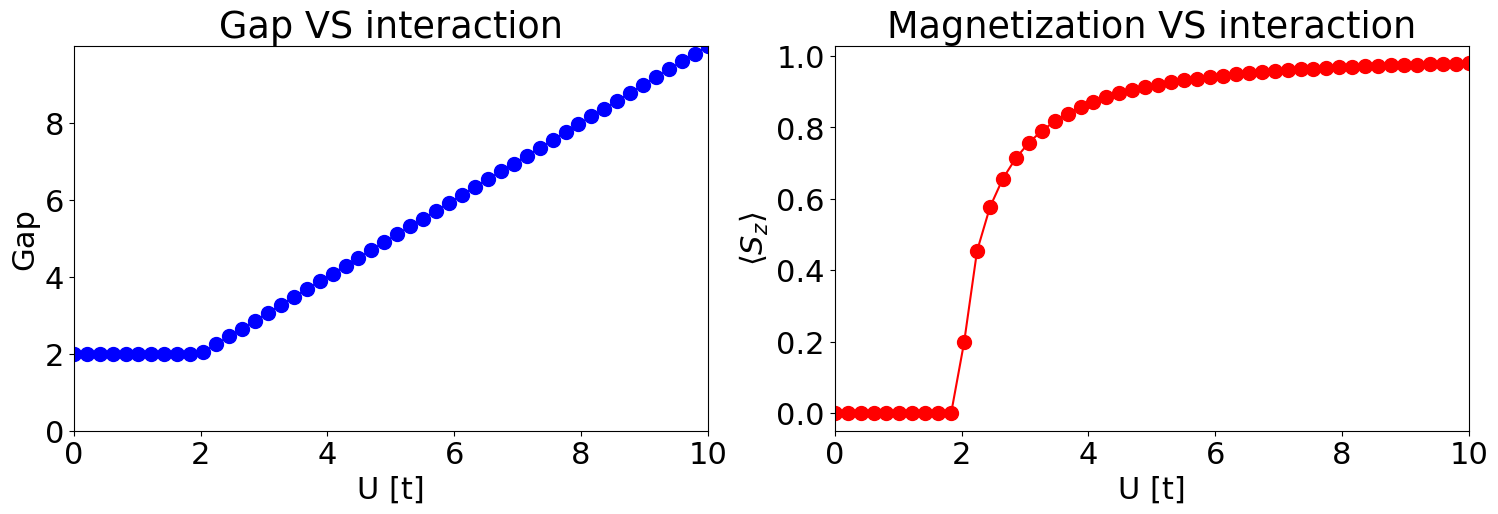

In [101]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell (with internal sublattice)
L = 1 # size of the system
g = g.get_supercell(L) # make a supercell
g.dimensionality = 0 # just retain the two sites per unit cell
h0 = g.get_hamiltonian() # generate the Hamiltonian

Us = np.linspace(0.,10.,50) # number of interactions
mzs = [] # empty list for magnetizations
gaps = [] # gaps of the systems
for U in Us:
    h = h0.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # perform SCF
    mz = h.get_vev("mz")[1] # magnetization of the second site
    mzs.append(abs(mz)) # store magnetization in that size
    gaps.append(h.get_gap()) # compute gap of the system and store it


plt.figure(figsize=(18,5))

plt.subplot(1,2,1) # plot the magnetization VS interaction
plt.title("Gap VS interaction")
plt.plot(Us,gaps,marker="o",c="blue",markersize=10) ; plt.xlim([min(Us),max(Us)])
plt.xlabel("U [t]") ; plt.ylabel("Gap") ; plt.ylim([0,max(gaps)])

plt.subplot(1,2,2) # plot the magnetization VS interaction
plt.title("Magnetization VS interaction")
plt.plot(Us,mzs,marker="o",c="red",markersize=10) ; plt.xlim([min(Us),max(Us)])
plt.xlabel("U [t]") ; plt.ylabel("$\\langle S_z \\rangle $")

### Quiz
- Identify the non-interacting and strongly interacting limit in the plot
- Why does the magnetization saturate at large interactions?
- Why is there a critical value to have magnetization?
- Why is there a gap even when there is no magnetization?
- Make the system bigger. WHat happens, and why?

## Gap opening in the Hubbard model
We will now see how the Hubbard interaction give rise to a gap opening in an interacting chain

Text(0, 0.5, 'Energy')

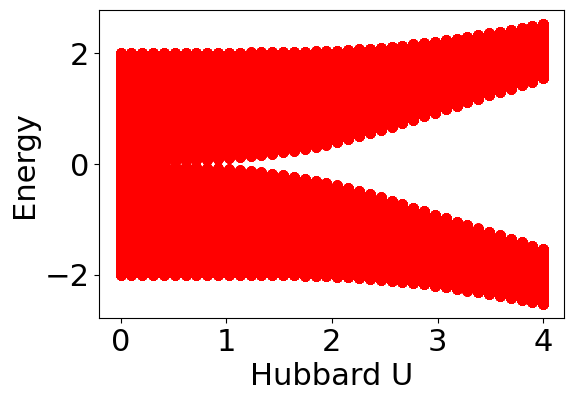

In [55]:
fig = plt.figure(figsize=(6,4))

Us = np.linspace(0.,4.0,40)

g = geometry.bichain() # generate a chain
h0 = g.get_hamiltonian() # generate the Hamiltonian

for U in Us:
    h = h0.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # perform SCF
    (k,e) = h.get_bands() # compute band structure
    plt.scatter(e*0. + U,e,c="red",s=40)
plt.xlabel("Hubbard U") ; plt.ylabel("Energy")

### Quiz
- Make the system very small (L=2), what happens and why?

## Gap opening in a spinless interacting model
We will now see how in a spinless model, a gap opening appears in the presence of interactions

Text(0, 0.5, 'Energy')

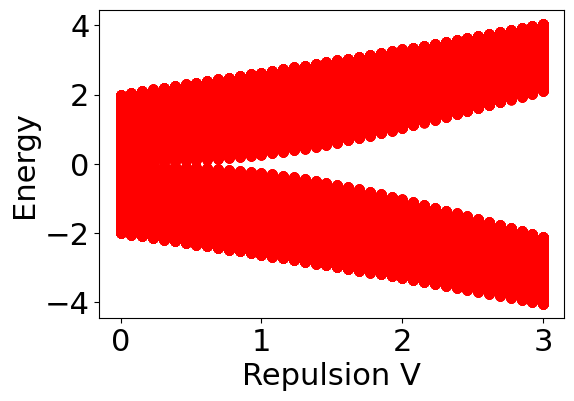

In [86]:
fig = plt.figure(figsize=(6,4))

Vs = np.linspace(0.,3.0,40)
g = geometry.bichain() # generate a chain with two sites
h0 = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
cdw = 0. # external CDW
h0.add_sublattice_imbalance(cdw) # add an external CDW

for V in Vs:
    h = h0.get_mean_field_hamiltonian(V1=V,mf="CDW",mix=0.9,filling=0.5) # perform SCF
    (k,e) = h.get_bands() # compute band structure
    plt.scatter(e*0. + V,e,c="red",s=40)
plt.xlabel("Repulsion V") ; plt.ylabel("Energy")

### Quiz
- Why does the gap increase with the interaction strength?
- Add some charge density wave (cdw) externally to the system, what do you observe and why?

## Symmetry breaking in the spinless fermionic chain
We will now see how interactions create a charge imbalance in the interacting spinless model

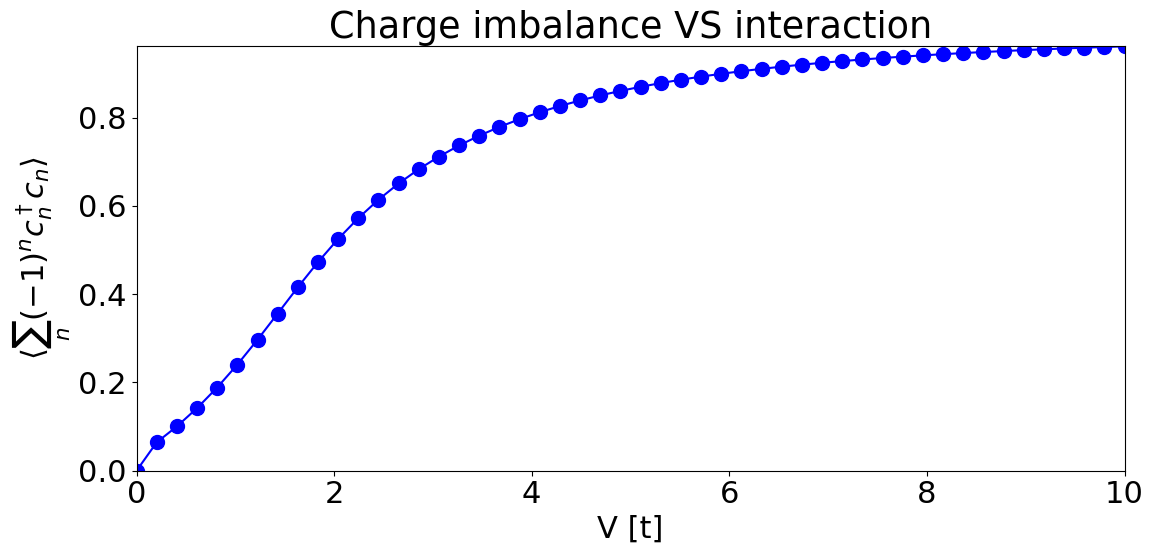

In [84]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell (with internal sublattice)
h0 = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
cdw = 0. # external CDW
h0.add_sublattice_imbalance(cdw) # add an external CDW


Vs = np.linspace(0.,10.,50) # number of interactions
dens = [] # empty list for magnetizations
for V in Vs:
    h = h0.get_mean_field_hamiltonian(V1=V,mf="CDW",mix=0.5,filling=0.5) # perform SCF
    den = h.get_vev(operator=None) # magnetization of the second site
    dens.append(abs(den[0]-den[1])) # store magnetization in that size

    
plt.figure(figsize=(12,6))

plt.title("Charge imbalance VS interaction")
plt.plot(Vs,dens,marker="o",c="blue",markersize=10) ; plt.xlim([min(Vs),max(Vs)])
plt.xlabel("V [t]") ; plt.ylabel("$\\langle \\sum_n (-1)^n c^\\dagger_n c_n \\rangle $") ; plt.ylim([0,max(dens)])
plt.tight_layout()


### Quiz
- Why does the charge imbalance sature to 1 for large interactions?
- Add some CDW externally to the system, what do you observe and why?

## The strongly interacting limit of the Hubbard model
Let us now compare the energies of a ferromagnetic and antiferromagnetic state in the strong coupling limit

Text(0, 0.5, 'Energy FE - AF [t]')

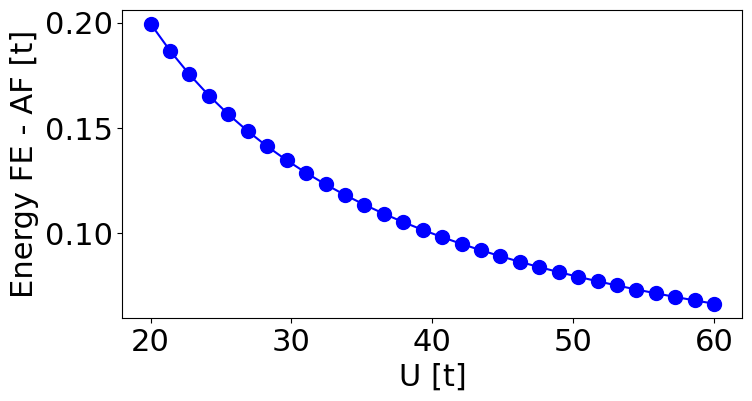

In [42]:
# let us now compute the energy difference as a function of U
from pyqula import geometry

fig = plt.figure(figsize=(8,4))

def get_energy_difference(U):
    g = geometry.bichain() # generate a chain with two sites per unit cell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (hfe,efe) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="ferro",mix=0.9) # FE
    (haf,eaf) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="antiferro",mix=0.9) # AF
    return efe - eaf

Us = np.linspace(20.,60,30) # values of U considered

Et = [get_energy_difference(U) for U in Us] # energy differences

plt.plot(Us,Et,c="blue",marker="o",markersize=10) # plot total energy VS value of U
plt.xlabel("U [t]") ; plt.ylabel("Energy FE - AF [t]")

### Quiz
- Which state has the lowest energy?
- Discuss why the dependence of 1/U is observed in the energy differences between FE and AF configurations
- Compute this very same curve but going to lower values of U. Why does the 1/U behavior break down?

## Non-collinear magnetism in the Hubbard model from competing interactions
Let us now include further neighbor hoppings, which promotes competing magnetic interactions

(-10.45, 10.45, -0.05500000000000001, 0.05500000000000001)

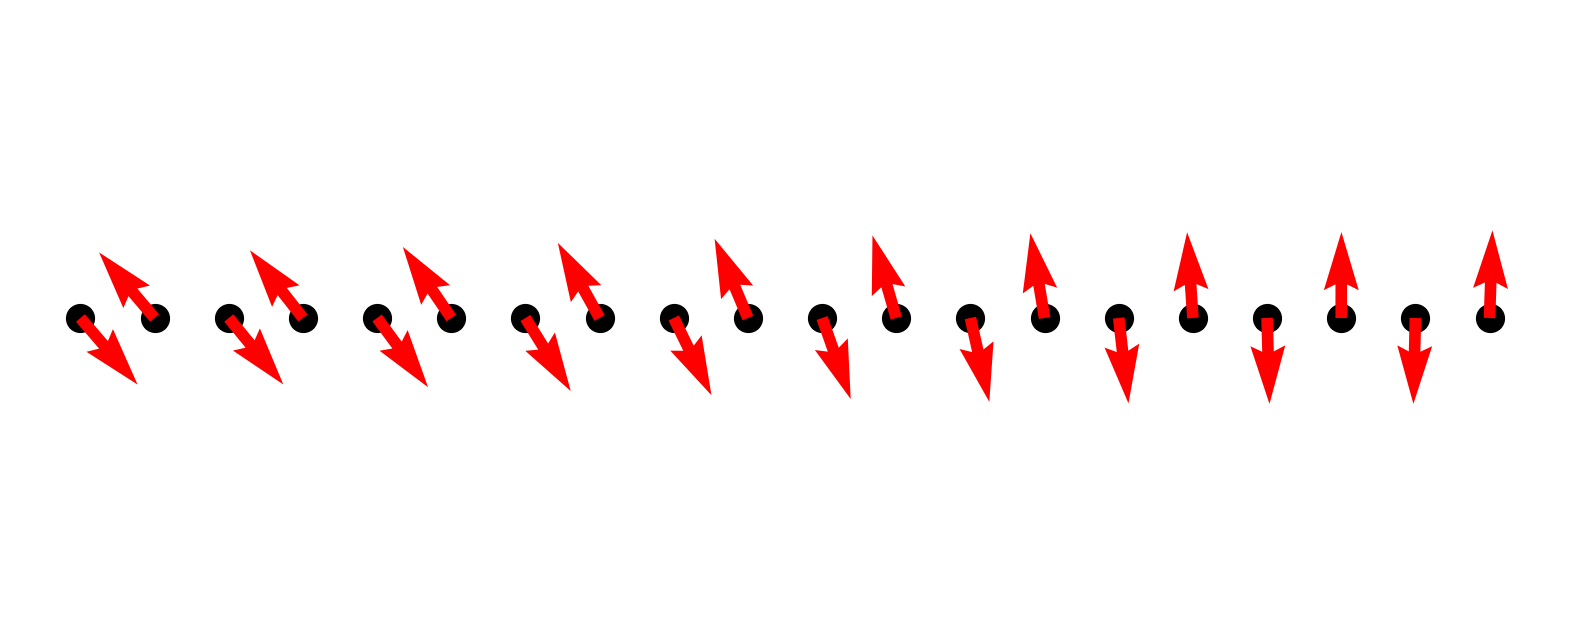

In [15]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(20) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian(tij=[1.,.3]) # generate the Hamiltonian

# generate the selfconsistent (SCF) Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Exercise
- Discuss why including second neighbor hopping gives rise to a non-collinear magnetic state
- Is there a long neighbor hopping that can be included that does not lead to non-collinearity? Include it and show that you recover the antiferromagnetic state

## Non-collinear magnetism in the Hubbard model from spin-orbit coupling
We will now see that spin-orbit coupling is also able to generate a non-collinear magnetic texture

(-4.95, 4.95, -0.05500000000000001, 0.05500000000000001)

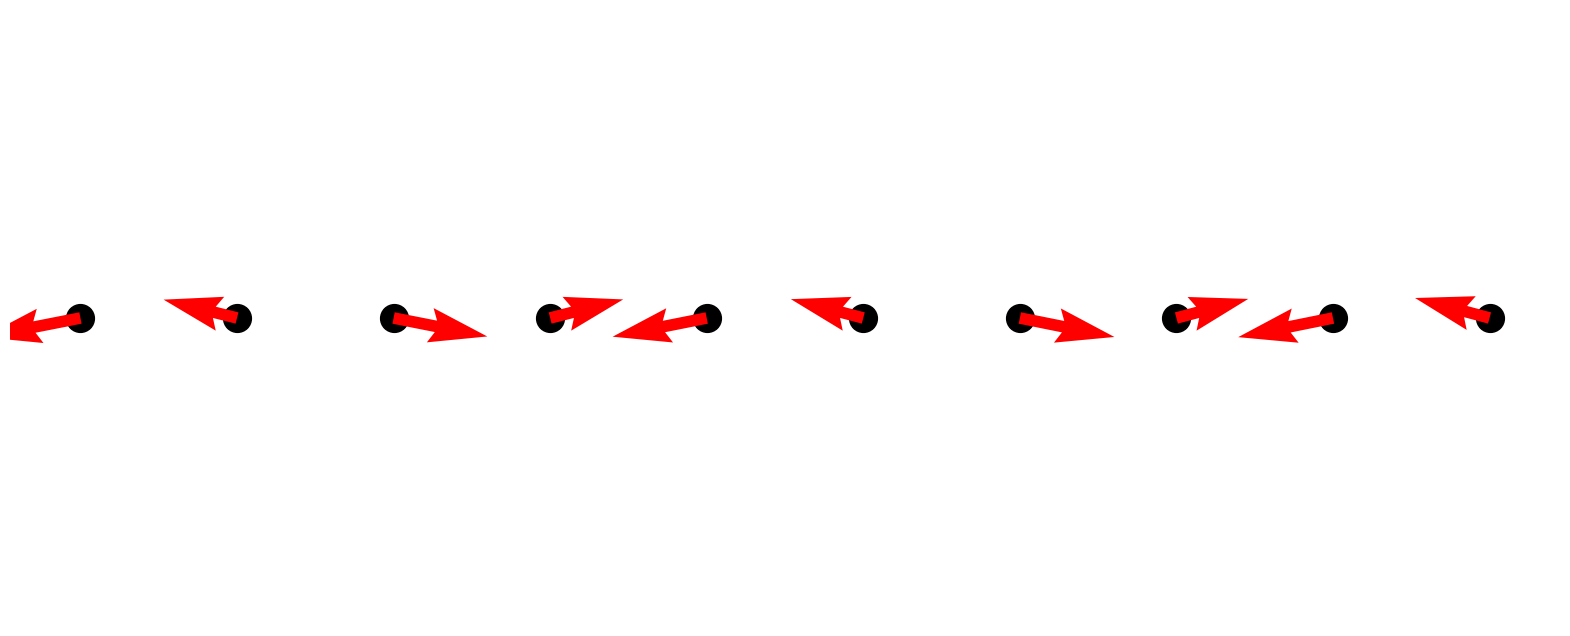

In [10]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(10) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_rashba(1.) # add Rashba spin-orbit coupling

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="random",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Quiz
- Discuss why spin-orbit coupling gives rise to non-collinear magnetism
- What happens to the spin texture if the sign of the Rashba term is reversed? (Physically, it means flipping the sample upside down)

## Non-collinear magnetic order from geometric frustration
We will now address 2D models that show non-collinear magnetism due to the geometric frustration of the lattice.

(-4.124999999999999, 4.124999999999999, -2.3815698604072066, 2.381569860407206)

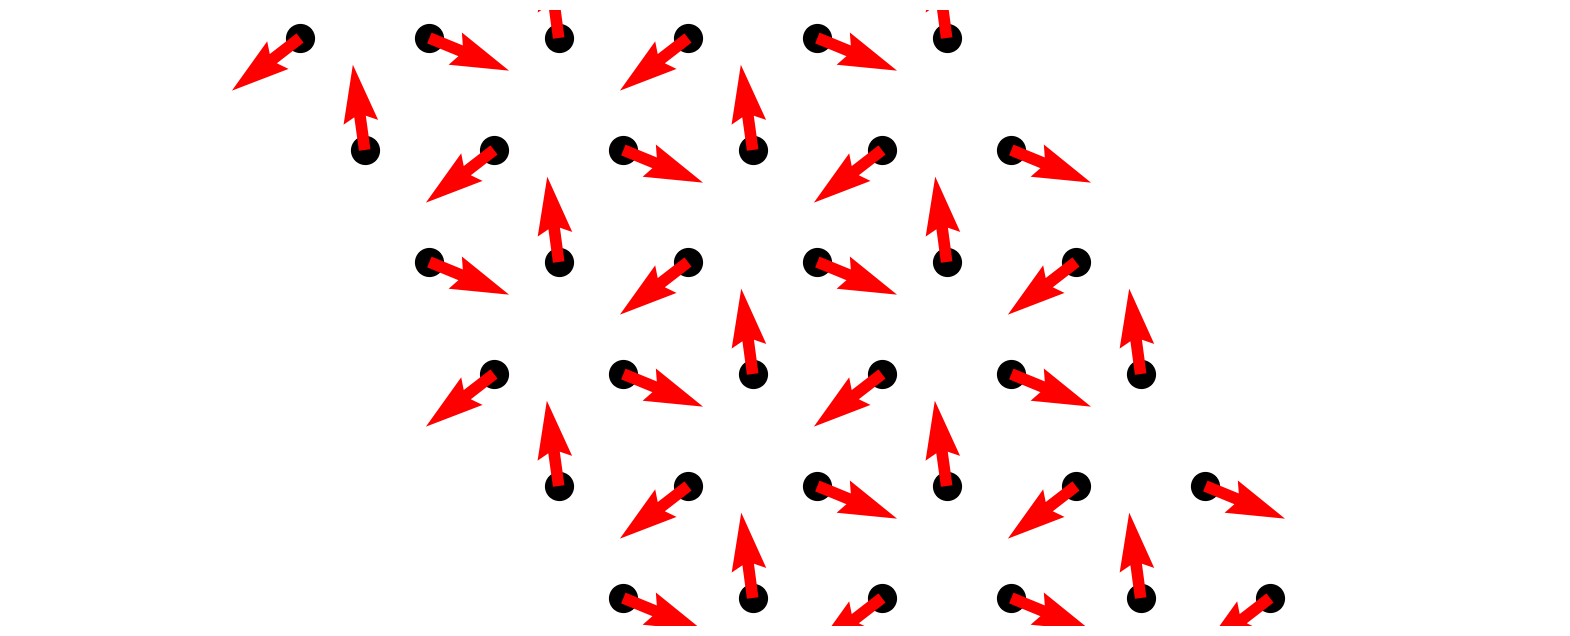

In [12]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a chain 
g = g.get_supercell((3,3)) # make a supercell
h = g.get_hamiltonian() # generate the Hamiltonian

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
hs = h.get_supercell(2) # generate a supercell
mx = hs.extract("mx") ; my = hs.extract("my") ; x = hs.geometry.r[:,0] ; y = hs.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red")  # plot magnetization
plt.axis("equal") ; plt.axis("off")

### Quiz
- Plot the band structure for the SCF solution for the 3x3 supercell, and estimate its gap
- Plot the band structure for the SCF solution for the 1x1 supercell, and estimate its gap
- Can you infer which one is the lowest energy solution, and why?